In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wine_clust.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.shape

(178, 13)

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Kmeans Clustering

In [8]:
#Importing kmeans from cluster
from sklearn.cluster import KMeans

In [9]:
#creating empty list
wcss=[]
#finding value for optimum number of clusters
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)#inertia_ used to find wcss

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

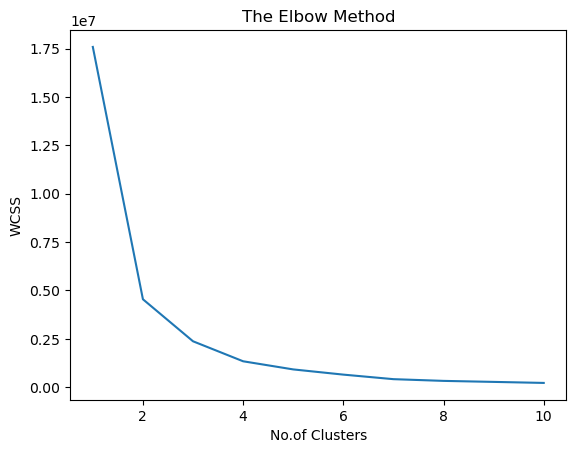

In [10]:
#ploting number of clusters against wcss
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')

In [11]:
#applying k=4
kmeans= KMeans(n_clusters = 2, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df)

In [12]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
#calculating silhouette score for kmeans clustering
sil_avg=silhouette_score(df,y_kmeans)

In [15]:
sil_avg

0.6568536504294317

In [16]:
kmeans_sil_score = [] # empty list for appending silhouette scores
for i in range(2,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(df)
    sil_avg = silhouette_score(df, y_kmeans)#calculating silhouettte score
    kmeans_sil_score.append(sil_avg) 

print(kmeans_sil_score)       
     

[0.6568536504294317, 0.5711381937868839, 0.5572288268257269, 0.5489993239795681, 0.5656413100386375, 0.5621677013863702, 0.5398971441034123, 0.5307235924738345, 0.5203380520993409, 0.5173820709255152, 0.5028053360697292, 0.5150160324834328]


Text(0, 0.5, 'Silhouette Score')

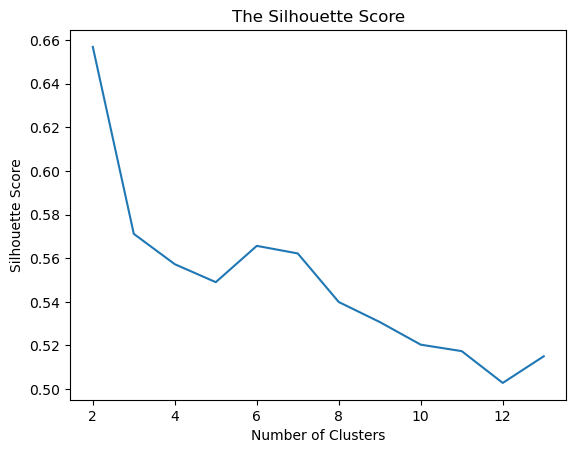

In [17]:
#ploting number of clusters against silhouette score
plt.plot(range(2,14),kmeans_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Agglomerative Hierarchical Clustering

In [18]:
import scipy.cluster.hierarchy as sch

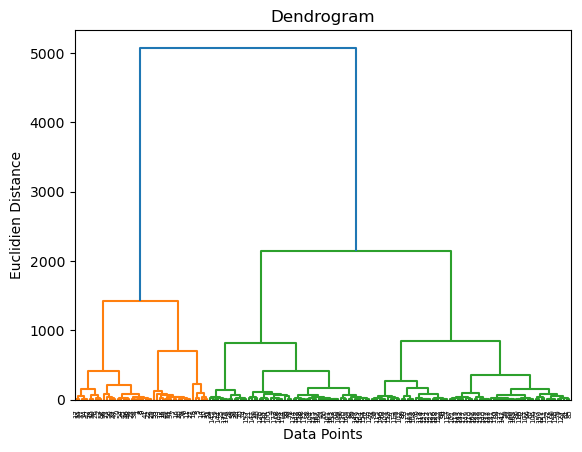

In [19]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidien Distance')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(df)

In [21]:
y_ahc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [22]:
#calculating silhouette score for ahc
sil_avg2=silhouette_score(df,y_ahc)

In [23]:
sil_avg2

0.6587292996216912

In [24]:
#plotting sillhouette score 
agglo_sil_score = [] # empty list for appending silhouette scores
for i in range(2,11):
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    y_ahc=hc.fit_predict(df)
    sil_avg2 = silhouette_score(df,y_ahc)
    agglo_sil_score.append(sil_avg2) 

print(agglo_sil_score)

[0.6587292996216912, 0.5644796401732071, 0.5606726948394264, 0.507484304423379, 0.5270523448339728, 0.536921553655013, 0.5299175684221897, 0.5307062601720831, 0.5217812922193543]


Text(0, 0.5, 'Silhouette Score')

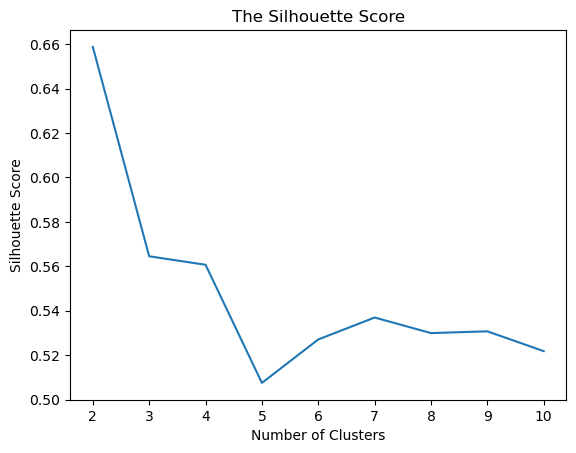

In [25]:
#ploting number of clusters against silhouette score
plt.plot(range(2,11),agglo_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# DBSCAN

Deciding Optimal value for epsilon

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
neighbors = NearestNeighbors(n_neighbors=14)#min_samples choosen as 14
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

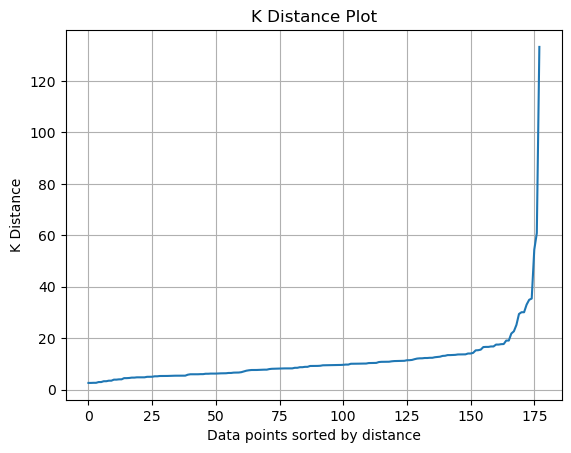

In [28]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K Distance Plot')
plt.ylabel('K Distance')
plt.xlabel('Data points sorted by distance')
plt.grid()

From the graph we can infer that elbow occuring above the value 30

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
# Epsilon(eps) value choosen is 40, min_samples >= D+1(D-Dimension of dataset),D here is 13,so D+1=14 . The minimum value of MinPts must be chosen at least 14.
db=DBSCAN(eps=40,min_samples=14,metric='euclidean',algorithm='auto' )

In [31]:
y_db=db.fit_predict(df)

In [32]:
y_db

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0], dtype=int64)

In [33]:
#calculating silhouette score for DBSCAN
sil_avg3=silhouette_score(df,y_db)
sil_avg3

0.5444691154003343

In [34]:
#plotting sillhouette score 
db_sil_score = [] # empty list for appending silhouette scores
for i in range(23,42):
    db=DBSCAN(eps=i,min_samples=14,metric='euclidean',algorithm='auto')
    y_db=db.fit_predict(df)
    sil_avg_db = silhouette_score(df,y_db)#calculating silhouettte score
    db_sil_score.append(sil_avg_db) 

print(db_sil_score)  

[-0.22497916301280904, -0.16781126765362178, -0.15808955285377874, -0.04083834929682573, -0.03424976218948047, 0.027235362182086446, 0.15001242947037663, 0.16474133840253946, 0.2700075883049726, 0.2768296333249304, 0.29113242666618455, 0.44594144328837376, 0.45570249889838116, 0.5034430622000288, 0.5282407698022323, 0.5282407698022323, 0.5282407698022323, 0.5444691154003343, 0.391957522391161]


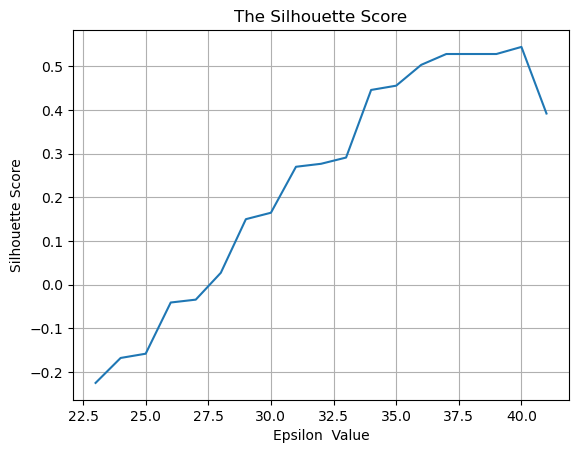

In [35]:
#ploting number of clusters against silhouette score
plt.plot(range(23,42),db_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Epsilon  Value')
plt.ylabel('Silhouette Score')
plt.grid()